# <font color='gray'>Ada Santander Coders 2023 | 2º Semestre - ED (1) | 1117</font>
# <font color='silver'>Técnicas de programação PY I - Thiago Kuma</font>

## <font>Projeto Final - Débora Araújo</font>

### O propósito desse projeto é demostrar como fazer limpeza e transformação em um dataset para posteriormente ser usado em atividades de análise de dados


In [317]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.11.5


In [318]:
# Imports
import pandas as pd
import numpy as np

#visualização dos graficos
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


In [319]:
# Carrega o dataset >> fonte: https://www.kaggle.com/datasets/arjunamla02/bank-marketing-data-v1 

#Kuma, veja no link acima o dicionário de dados, caso tenha interesse

#como o Pandas encontrou diferentes tipos de dados na mesma coluna e não está certo de como interpretá-los corretamente,
#desativei a inferência de tipo de baixa memória definindo o parâmetro low_memory=False,
#o que fará com que o Pandas leia mais dados de uma vez para determinar o tipo de dados
df = pd.read_csv("bank_marketing_updated_v1.csv", low_memory=False) 

In [320]:
# Visualizar o tamanho do dataset
df.shape

(45213, 19)

In [321]:
# Visualizar a amostra do dataset
df.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [322]:
#apagar a primeira linha do dataset que tem informações do dicionário
df.drop(df.index[0], inplace=True)

In [323]:
# Visualizar o dataframe
df.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
5,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no


In [324]:
#mudar os rotulos das colunas e elimnar a primeira linha que tem os valores
novos_nomes_colunas = df.iloc[0] # Pega os valores da primeira linha, retorna uma serie pandas
df.columns = novos_nomes_colunas # Define os valores como nomes das colunas
df.drop(df.index[0], inplace=True) # Remove a primeira linha do DataFrame
df.head() #visualiza o dataframe depois da transformação

1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
5,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
6,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [325]:
# Informações sobre a estrutura do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 2 to 45212
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerid  45211 non-null  object
 1   age         45191 non-null  object
 2   salary      45211 non-null  object
 3   balance     45211 non-null  object
 4   marital     45211 non-null  object
 5   jobedu      45211 non-null  object
 6   targeted    45211 non-null  object
 7   default     45211 non-null  object
 8   housing     45211 non-null  object
 9   loan        45211 non-null  object
 10  contact     45211 non-null  object
 11  day         45211 non-null  object
 12  month       45161 non-null  object
 13  duration    45211 non-null  object
 14  campaign    45211 non-null  object
 15  pdays       45211 non-null  object
 16  previous    45211 non-null  object
 17  poutcome    45211 non-null  object
 18  response    45181 non-null  object
dtypes: object(19)
memory usage: 6.6+ MB


In [326]:
# Existem campos númericos que estão como object isso tem impacto na análise, então é preciso fazer a conversão
# Para certificar-se de que os dados na coluna object sejam convertíveis para o tipo numérico desejado.
# Se a coluna contiver valores que não podem ser convertidos diretamente (como strings que não representam números),
# é preciso tratá-los antes da conversão, por exemplo, usando pd.to_numeric() 
# com o parâmetro errors='coerce' para converter valores não numéricos para NaN:

df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')
df['day'] = pd.to_numeric(df['day'], errors='coerce')
df['campaign'] = pd.to_numeric(df['campaign'], errors='coerce')
df['pdays'] = pd.to_numeric(df['pdays'], errors='coerce')
df['previous'] = pd.to_numeric(df['previous'], errors='coerce')

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 2 to 45212
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  object 
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  object 
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(5), 

In [328]:
# Se o customerid não tem relevância para analise, pode-se removê-lo assim:
df.drop(["customerid"], axis = 1, inplace = True)
# Colunas
df.columns #visualizar o resultado

Index(['age', 'salary', 'balance', 'marital', 'jobedu', 'targeted', 'default',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response'],
      dtype='object', name=1)

In [329]:
#verificar linhas duplicadas 
duplicate_rows_df = df[df.duplicated()]
print("Numero de linhas duplicadas: ",duplicate_rows_df.shape)

Numero de linhas duplicadas:  (0, 18)


In [330]:
# A coluna jobedu tem armazenado dois dados (job e education) na mesma coluna 
# Essa situação precisa ser tratado, então é preciso separá-los
# Faz-se o split da coluna jobedu e cria-se a coluna job com o primeiro elemento antes da vírgula
df['job'] = df["jobedu"].apply(lambda x:x.split(",")[0]) #utilizando o metodo apply que impacta todos os registros da coluna
df.head()

1,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
2,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
3,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
4,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
5,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
6,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [331]:
# Faz-se o split da coluna jobedu e cria-se a coluna education com o segundo elemento antes da vírgula
df['education'] = df["jobedu"].apply(lambda x:x.split(",")[1]) #utilizando o metodo apply que impacta todos os registros da coluna
df.head()

1,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
2,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
3,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
4,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
5,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
6,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [332]:
# Drop da coluna "jobedu" 
df.drop(["jobedu"], axis = 1, inplace = True)
df.head()

1,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
2,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
3,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
4,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
5,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
6,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [333]:
# Um outra forma mais direta de fazer esse tratamento dacoluna jobedu 
# seria dividir a coluna jobedu em duas outras colunas delimitada o calor ',' 
# deixo aqui o código comentado abaixo a titulo de informação complementar, visto que segui pelo 
# caminho mais alinhado com a abordagem das aulas
#df[['job', 'edu']] = df.jobedu.str.split(",", expand = True)

## Tratamento de Valores Ausentes

In [334]:
# Verificar se o df tem valores nulos
df.isna().sum()

1
age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [335]:
# O metodo describe também é útil para verificar ausência de informação
#-1 indica valor ausente
df.describe()

1,age,salary,day,campaign,pdays,previous
count,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.935651,57006.171065,15.806419,2.763841,40.197828,0.580323
std,10.619198,32085.718415,8.322476,3.098021,100.128746,2.303441
min,18.000000,0.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,31.000000,63.000000,871.000000,275.000000


In [336]:
# Calcular o percentual de variaveis ausentes da variavel age
print('age',df.age.isnull().mean()*100)

#calcular o percentual de variaveis ausentes da variavel month
print('month', df.month.isnull().mean()*100)

#calcular o percentual de variaveis ausentes da variavel salary
print('salary', df.salary.isnull().mean()*100)

#calcular o percentual de variaveis ausentes da variavel salary
print('response', df.response.isnull().mean()*100)

age 0.0442370219636814
month 0.11059255490920351
salary 0.0
response 0.0663555329455221


age - Como o percentual é baixo ( <30% ) não se  deve eliminar a coluna, então pode-se eliminar as linhas dos valores ausentes
(20 registros) OU fazer a imputação (modificando levemente a variável com medidas de tendência central media/moda/mediana).

month - Como o percentual é baixo (<30%) não se deve eliminar a coluna, então pode-se eliminar as linhas dos valores ausentes 
(50 registros) OU fazer a imputação (modificando levemente a variável com medidas de tendência central media/moda/mediana).

salary - Como o percentual é baixo (<30%) não se deve eliminar a coluna, então pode-se eliminar as linhas dos valores ausentes 
(26 registros) OU fazer a imputação (modificando levemente a variável com medidas de tendência central media/moda/mediana)

response - Como o percentual é baixo (<30%) e além disso essa é a variável target não se pode eliminar a coluna, a ação será eliminar os 30 registros, se o percentual fosse alto seria necessário recursar o dataset

#### Valores ausentes variável age 

In [337]:
# Verifica colunas com valor 0 para ver se não representa valor ausente 
# (no caso real era preciso validar com a área de negócio)
df.age.value_counts()

age
32.0    2085
31.0    1994
33.0    1972
34.0    1929
35.0    1892
        ... 
93.0       2
90.0       2
95.0       2
88.0       2
94.0       1
Name: count, Length: 77, dtype: int64

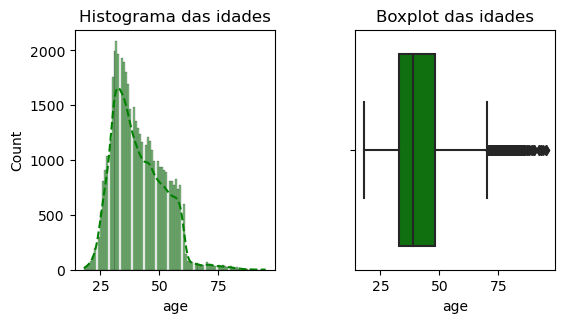

In [338]:
#Plot - tamanho da figura 
plt.figure(figsize = (6,3))
#ajustar os espaço entre os gráficos
plt.tight_layout() 
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4, hspace=0.4) 


#histograma age
plt.subplot(121)
sns.histplot(data=df.age, kde = True, color = "green", line_kws = {'linestyle': 'dashed'})
plt.title('Histograma das idades', fontsize = 12)

#boxplot age
plt.subplot(122)
sns.boxplot(x=df['age'], color="green")
plt.title('Boxplot das idades', fontsize=12)
plt.show()

A variável Age não segue uma distribuição normal. Ela tem uma distribuição assimétrica, logo não pode usar média. 
A maioria dos registros estão entre 30 e 50 anos, há alguns clientes até 70 e depois disso há um grande número de outliers, 
que impactam no cálculo da média.

In [339]:
# Imputar a mediana no valor da idade
df.age.fillna(df['age'].median(), inplace=True)

In [340]:
# Validar a imputação para os valores nulos para age
df.age.isna().sum()

0

In [341]:
# Revalidar as variaveis de tendência central novamente
df.describe()

1,age,salary,day,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.934795,57006.171065,15.806419,2.763841,40.197828,0.580323
std,10.616926,32085.718415,8.322476,3.098021,100.128746,2.303441
min,18.000000,0.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,31.000000,63.000000,871.000000,275.000000


#### Valores ausentes variável Salary 


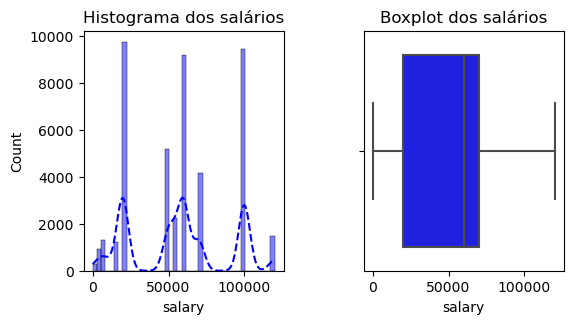

In [342]:
#Plot - tamanho da figura 
plt.figure(figsize = (6,3))
#ajustar os espaço entre os gráficos
plt.tight_layout() 
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4, hspace=0.4) 


#histograma salary
plt.subplot(121)
sns.histplot(data=df.salary, kde = True, color = "blue", line_kws = {'linestyle': 'dashed'})
plt.title('Histograma dos salários', fontsize = 12)

#boxplot salary
plt.subplot(122)
sns.boxplot(x=df['salary'], color="blue")
plt.title('Boxplot dos salários', fontsize=12)
plt.show()

A variável Salary não segue uma distribuição normal. Ela tem uma distribuição assimétrica, logo não pode usar média.
O valor mais frequente está abaixo da média e mediana, se usar a moda irá reforçar essa situação, então é mais adequado 
usar a mediana

In [343]:
# Imputar a mediana no valor do salário
df.age.fillna(df['salary'].median(), inplace=True)

In [344]:
# Tratar os valores ausentes coluna categórica month com a moda
df.month.value_counts()

month
may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: count, dtype: int64

In [345]:
# Imputar valores em month com valores ausentes com a moda (mais frequencia) uma vez que são poucos registros
df.month.fillna("may, 2017",inplace=True)
df.month.isnull().sum()

0

In [346]:
# Ver os valores de response
df.response.value_counts()

response
no     39894
yes     5287
Name: count, dtype: int64

In [347]:
# Uma vez que a variável target não deve sofre imputação será feito o drop nos 30 registros
df.dropna(subset=['response'], inplace=True)

In [348]:
# Validação do tratamento para os valores nulos
df.isnull().sum()

1
age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

In [349]:
# Ver os valores de pday
df.pdays.value_counts()

pdays
-1      36930
 182      167
 92       147
 91       126
 183      125
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: count, Length: 559, dtype: int64

In [350]:
# Tratar valor ausente pdays -1 not as number
df.pdays = df.pdays.replace(-1,np.nan)

In [351]:
# Verificar o total de valores ausentes
df.pdays.isnull().sum()

36930

In [352]:
# Calcular o percentual de valores ausentes
df.pdays.isnull().mean()*100

81.73789867422147

81.73% de valores ausentes é inviável fazer qualquer tipo de tratamento, então para pdays a solução será dropar essa coluna

In [353]:
#Proporção da variável estado civil
df.marital.value_counts(normalize=True)

marital
married     0.601912
single      0.282907
divorced    0.115181
Name: proportion, dtype: float64

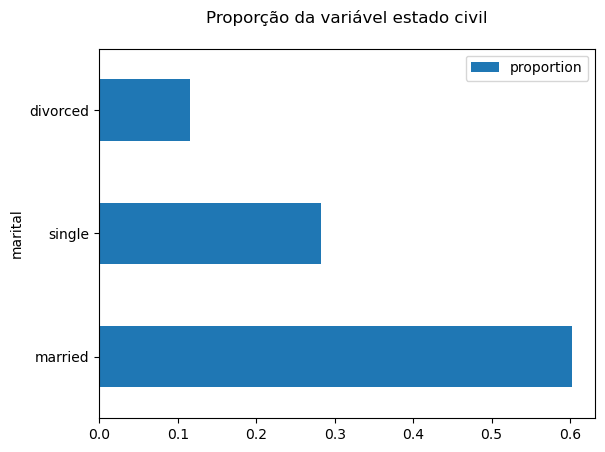

In [354]:
#plot
df.marital.value_counts(normalize=True).plot(kind="barh")
plt.title("Proporção da variável estado civil\n")
plt.legend()
plt.show()

## Fim do Projeto